# Nguyễn Đức Đạt
#Nhóm 3 - DA14
#Đề số 1



# Import Library

In [572]:
#Import Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import tree

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score


#ensemble
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import SimpleImputer

#Library label encoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [573]:
#import dataset
df = pd.read_csv('/content/ex1.csv')

# <b> <font color ='green' >1. Explore Data Analysis </font> <b> 


## <b> <font color ='green' >1.1 Overall Info </font> <b> 


In [574]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [575]:
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [577]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


## <b> <font color ='green' >1.2 Clean missing values

### <b> <font color ='green' >1.2.a Check Null values


In [578]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [579]:
#% Null values
dict_null = dict()
for i in df.columns:
  dict_null[i] = df[i].isnull().sum()/len(df['Timestamp'])*100
df1 = pd.DataFrame.from_dict(dict_null.items())
print(df1)

                            0          1
0                   Timestamp   0.000000
1                         Age   0.000000
2                      Gender   0.000000
3                     Country   0.000000
4                       state  40.905481
5               self_employed   1.429706
6              family_history   0.000000
7                   treatment   0.000000
8              work_interfere  20.969023
9                no_employees   0.000000
10                remote_work   0.000000
11               tech_company   0.000000
12                   benefits   0.000000
13               care_options   0.000000
14           wellness_program   0.000000
15                  seek_help   0.000000
16                  anonymity   0.000000
17                      leave   0.000000
18  mental_health_consequence   0.000000
19    phys_health_consequence   0.000000
20                  coworkers   0.000000
21                 supervisor   0.000000
22    mental_health_interview   0.000000
23      phys_hea

In [580]:
df.drop(columns = ['Timestamp','state','Country','comments'], inplace = True)

In [581]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

### <b> <font color ='green' >1.2.b Clean missing values of self_employed column

In [582]:
df['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [583]:
df['self_employed'].value_counts()


No     1095
Yes     146
Name: self_employed, dtype: int64

In [584]:
df['self_employed'].replace(np.NaN,'No',inplace=True)

In [585]:
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

### <b> <font color ='green' >1.2.c Clean missing values of work_interfere column

In [586]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [587]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [588]:
df['work_interfere'].replace(np.NaN, "Don't Know",inplace = True)

In [589]:
df['work_interfere'].value_counts()

Sometimes     465
Don't Know    264
Never         213
Rarely        173
Often         144
Name: work_interfere, dtype: int64

In [590]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

## <b> <font color ='green' >1.3 Checking values of all columns

In [591]:
my_list = df.columns.values.tolist()

for column in my_list:
  print(column)
  print(df[column].unique())

Age
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning andr

### <b> <font color ='green' >1.3.a  Age Column

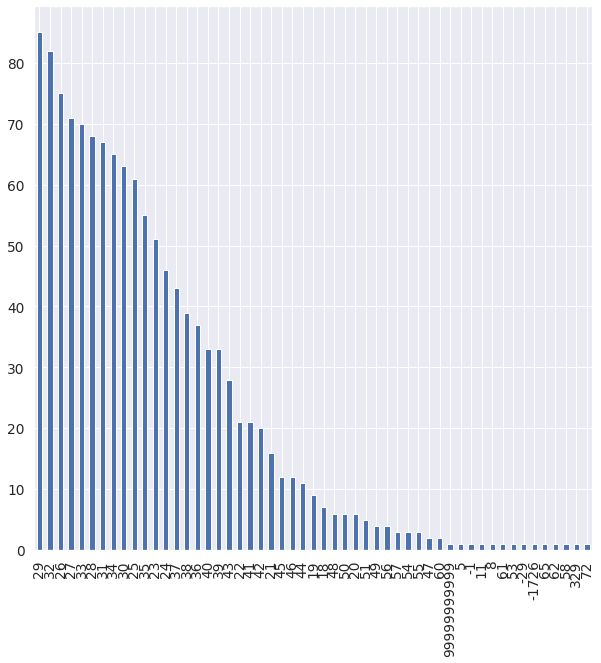

In [592]:
from matplotlib.pyplot import figure

figure(figsize=(10, 10))
df['Age'].value_counts().plot( kind= 'bar')

In [593]:
outliers =[]
for age in df['Age'].values:
  if age < 0 or age >100 :
    outliers.append(age)
    print(outliers) 


[-29]
[-29, 329]
[-29, 329, 99999999999]
[-29, 329, 99999999999, -1726]
[-29, 329, 99999999999, -1726, -1]


In [594]:
#Because There is only 5 outliers comparing total 1259 entries, so we can remove values of outliers

df = df.loc[(df['Age'] > 18) & (df['Age'] <100)]

In [595]:
# 0 values means no outliers 
print(df[df["Age"].isin(outliers)] )


Empty DataFrame
Columns: [Age, Gender, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence]
Index: []

[0 rows x 23 columns]


In [596]:
#Grouping Age
Age_Group = pd.cut(df['Age'],bins=[17,23,30,51,100],labels=['18-22', '23-30 ','30-50', '> 51'])
df.insert(23,'Age_Group',Age_Group)
df['Age_Group'].unique()

['30-50', '18-22', '23-30 ', '> 51']
Categories (4, object): ['18-22' < '23-30 ' < '30-50' < '> 51']

In [597]:
df = df.drop(columns='Age')


### <b> <font color ='green' >1.3.b  Gender Column

In [598]:
df1= df['Gender'].unique()
print(df1)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'Cis Male' 'Woman' 'f' 'Mal' 'Male (CIS)'
 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah' 'Enby'
 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender' 'cis-female/femme'
 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male ' 'Man' 'Trans woman'
 'msle' 'Neuter' 'Female (trans)' 'queer' 'Female (cis)' 'Mail' 'cis male'
 'Malr' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


In [599]:
male_string = ["M", "Male", "male", "m", "Male-ish", "maile", "Cis Male", "Mal", "Male (CIS)","Make", "Male ", "Man","msle", "Mail", "cis male","Malr","Cis Man"]
female_string = ["Female", "female", "Cis Female", "F","Woman",  "f", "Femake","woman", "Female ", "cis-female/femme","Female (cis)","femail"]
others_string = ["Trans-female", "something kinda male?", "queer/she/they", "non-binary","Nah", "all", "Enby", "fluid", "Genderqueer", "Androgyne", "Agender", "male leaning androgynous", "Guy (-ish) ^_^", "Trans woman", "Neuter", "Female (trans)", "queer", "ostensibly male, unsure what that really means"]           

for index, row in df.iterrows():

    if str(row.Gender) in male_string:
        df['Gender'].replace(to_replace=row.Gender, value='male', inplace=True)

    if str(row.Gender) in female_string:
        df['Gender'].replace(to_replace=row.Gender, value='female', inplace=True)

    if str(row.Gender) in others_string:
        df['Gender'].replace(to_replace=row.Gender, value='other', inplace=True)


print(df['Gender'].unique())

['female' 'male' 'other']


In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     1244 non-null   object  
 1   self_employed              1244 non-null   object  
 2   family_history             1244 non-null   object  
 3   treatment                  1244 non-null   object  
 4   work_interfere             1244 non-null   object  
 5   no_employees               1244 non-null   object  
 6   remote_work                1244 non-null   object  
 7   tech_company               1244 non-null   object  
 8   benefits                   1244 non-null   object  
 9   care_options               1244 non-null   object  
 10  wellness_program           1244 non-null   object  
 11  seek_help                  1244 non-null   object  
 12  anonymity                  1244 non-null   object  
 13  leave                      1244 n

# <b> <font color ='green' >2. Preprocessing - Encoding </font> <b> 


In [601]:
label_dict = {}
#Label-Enconding
le = preprocessing.LabelEncoder()
for feature in df.columns:
  if feature != 'Age':
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    label_dict[labelKey] =labelValue
  else:
    label_dict['label_Age'] = list(df['Age'])


In [602]:
df.info()
df.head()

# Treatment column : Yes = 1, No = 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Gender                     1244 non-null   int64
 1   self_employed              1244 non-null   int64
 2   family_history             1244 non-null   int64
 3   treatment                  1244 non-null   int64
 4   work_interfere             1244 non-null   int64
 5   no_employees               1244 non-null   int64
 6   remote_work                1244 non-null   int64
 7   tech_company               1244 non-null   int64
 8   benefits                   1244 non-null   int64
 9   care_options               1244 non-null   int64
 10  wellness_program           1244 non-null   int64
 11  seek_help                  1244 non-null   int64
 12  anonymity                  1244 non-null   int64
 13  leave                      1244 non-null   int64
 14  mental_health_consequenc

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_Group
0,0,0,0,1,2,4,0,1,2,1,...,2,1,1,1,2,1,0,2,0,2
1,1,0,0,0,3,5,0,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,1,0,0,0,3,4,0,1,1,0,...,1,1,1,2,2,2,2,1,0,2
3,1,0,1,1,2,2,0,1,1,2,...,1,2,2,1,0,0,0,1,1,2
4,1,0,0,0,1,1,1,1,2,0,...,0,1,1,1,2,2,2,0,0,2


In [603]:
for key, value in label_dict.items():     
    print(key, value)

label_Gender ['female', 'male', 'other']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't Know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_coworkers ['No', 'Some of them', 'Yes']
label_supervisor ['No', 'Some of them', 'Yes']
label_mental_health_interview ['Maybe', 'No', 'Yes']
label_phys_health_interview ['Maybe', 'No', 'Yes']
lab

# <b> <font color ='green' >3. Covariance Matrix. Variability comparison between categories of variables </font> <b> 


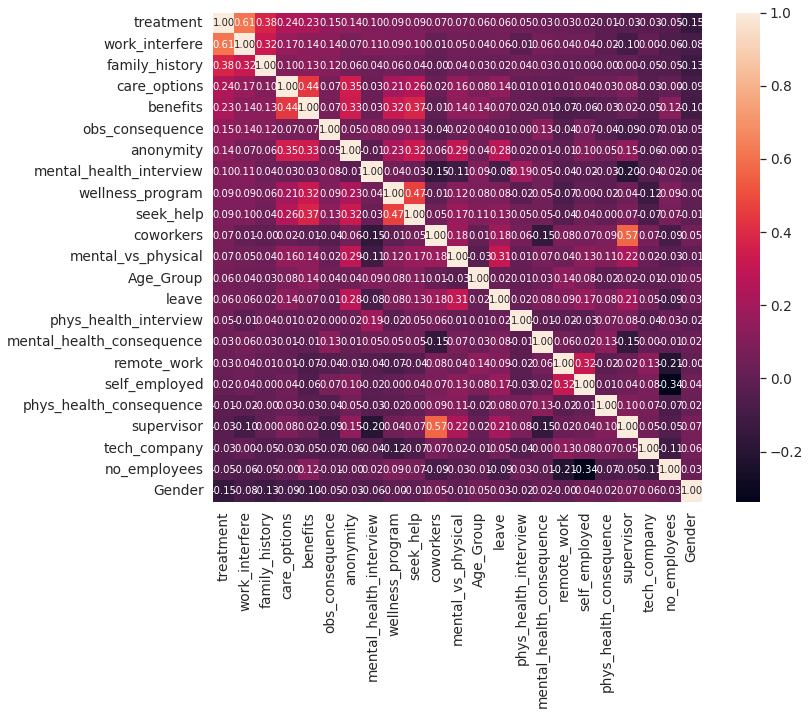

In [604]:
#treatment correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
corrmat = df.corr()
k = 23 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# <b> <font color ='green' >4. Some charts to see data relationship
 </font> <b> 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


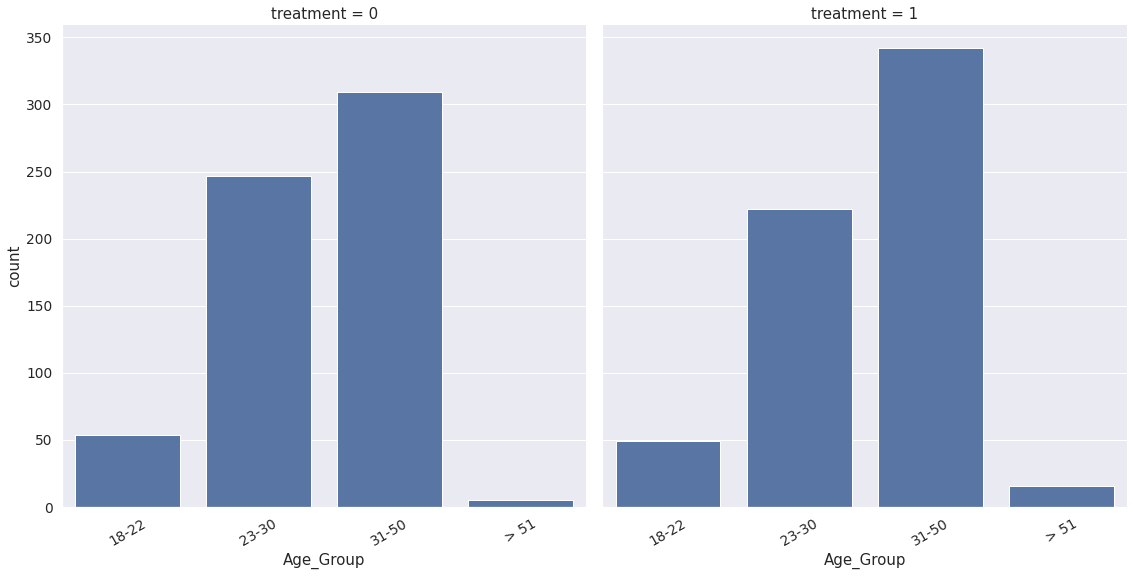

In [605]:
# Age & Treatment

g = sns.FacetGrid(df, col ='treatment', height=8)
g = g.map(sns.countplot, "Age_Group")

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i == 0): labels[i] = '18-22'
        elif(i ==1.0):labels[i] = '23-30'
        elif(i ==2.0):labels[i] = '31-50'
        elif(i ==3.0):labels[i] = '> 51'  
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x576 with 0 Axes>

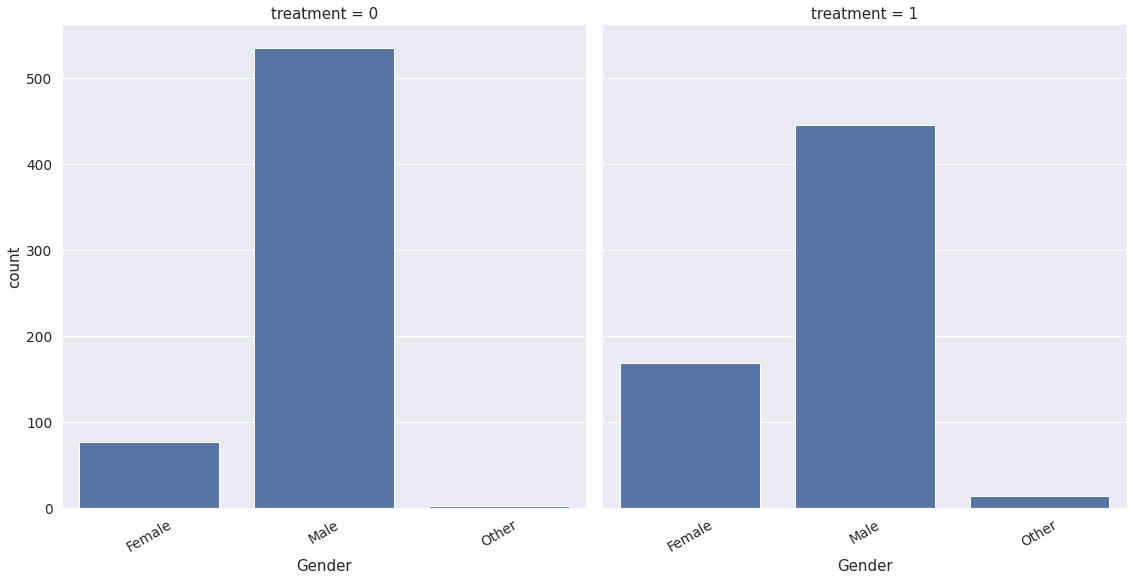

In [606]:
#Gender & Treatment
df1 = df
df1['Gender'] = df1['Gender'].astype('category')
print(df1['Gender'].unique())
plt.figure(figsize=(12,8))
g = sns.FacetGrid(df1, col='treatment', height=8)
g.map(sns.countplot,'Gender')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i == 0): labels[i] = 'Female'
        elif(i ==1):labels[i] = 'Male'
        else: labels[i] ='Other'  
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 32.403125000000024, 'Family History')

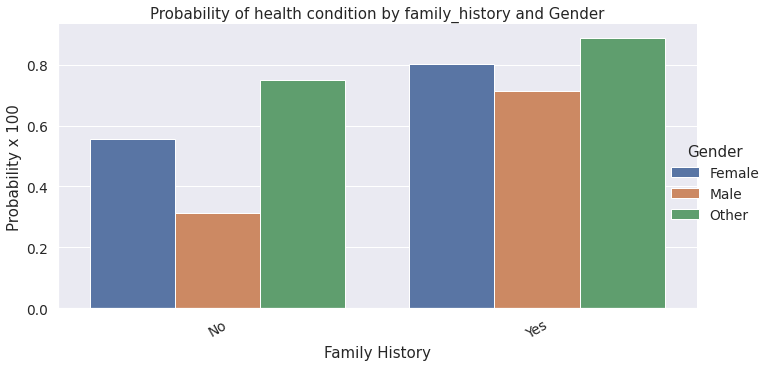

In [607]:
#Draw a catplot to show Percentage treatment for family_history by Gender

g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i == 0): labels[i] = 'No'
        else: labels[i] ='Yes'
    ax.set_xticklabels(labels, rotation=30) # set new labels

# title
g._legend.set_title('Gender')
new_labels = ['Female', 'Male', 'Other']
# replace labels
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.title('Probability of health condition by family_history and Gender')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 32.403125000000024, 'work_interfere')

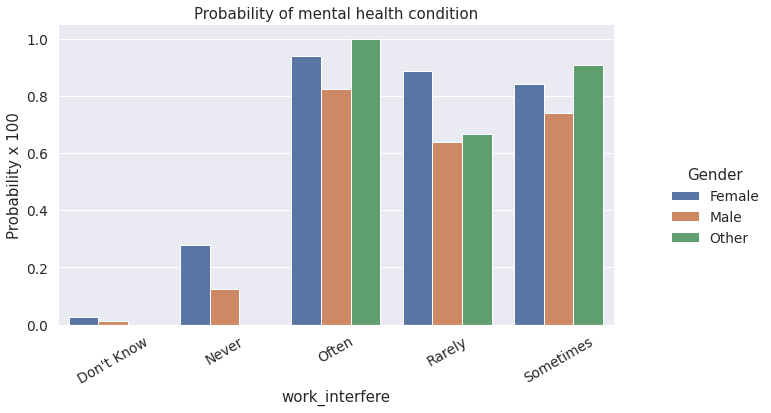

In [608]:
#Draw a catplot to show Percentage treatment for Work_interfere by Gender

g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i == 0): labels[i] = "Don't Know" 
        elif(i ==1):labels[i] = 'Never'
        elif(i ==2):labels[i] = 'Often'
        elif(i ==3):labels[i] = 'Rarely'
        else: labels[i] = 'Sometimes'
    ax.set_xticklabels(labels, rotation=30) # set new labels

# title
g._legend.set_title('Gender')
new_labels = ['Female', 'Male', 'Other']
# replace labels
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=1,right=0.8)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('work_interfere')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 31.200000000000024, 'Care Options')

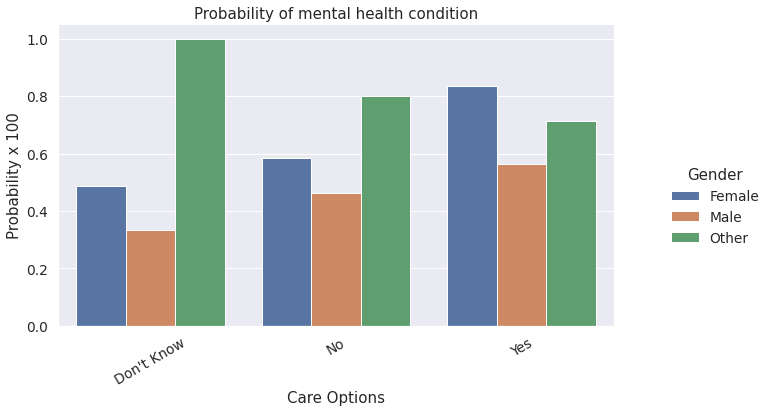

In [609]:
#Draw a catplot to show Percentage treatment for Care Benefit by Gender

g = sns.catplot(x="benefits", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i == 0): labels[i] = "Don't Know" 
        elif(i ==1):labels[i] = "No"
        else: labels[i] = "Yes"
    ax.set_xticklabels(labels, rotation=30) # set new labels

# title
g._legend.set_title('Gender')
new_labels = ['Female', 'Male', 'Other']
# replace labels
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=1,right=0.8)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care Options')

# <b> <font color ='green' >5. Fitting



In [610]:
y = df['treatment']
X = df.drop(columns='treatment')


# split dataset to test and training set (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# <b> <font color ='green' >6. Tuning


## <b> <font color ='green' >6.1 Writing Evaluate Model Function

In [611]:
methodDict = {} # This would be used for plotting the model's performance


# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve,classification_report
from sklearn.model_selection import cross_val_score

def EvaluateModel(model, y_test, y_pred, plot=False):
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_true =y_test, y_pred = y_pred)
  

    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred))
    
    #Classification Report
    print('Classification Report:' )
    print(classification_report(y_test,y_pred))
    
  
    methodDict[model.__class__.__name__] = metrics.accuracy_score(y_test, y_pred) * 100


## <b> <font color ='green' >6.2 Tuning


In [612]:
# Because dataset is small, I still would like to use Random Search instead of Bayes, or gridsearch because I want to minimize the tuning time and better result,. In this case : I use RandomizedSearchCV 
# Reference to https://towardsdatascience.com/gridsearch-vs-randomizedsearch-vs-bayesiansearch-cfa76de27c6b 


from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 2)

def RandomSearch(model, param_dist):
  reg_random = RandomizedSearchCV(estimator=model,
                    param_distributions=param_dist,
                    n_iter=10,  # search 20 times 
                    cv=kf,
                    n_jobs=8,
                    scoring='accuracy',
                    random_state =2)
  reg_random.fit(X_train,y_train)
  y_pred = reg_random.predict(X_test)
  print('RandomSearch. Best Score: ', reg_random.best_score_)
  print('RandomSearch. Best Params: ', reg_random.best_params_)
  accuracy_score = EvaluateModel(model, y_test, y_pred, plot =True)



# <b> <font color ='green' >7. Evaluate Models


## <b> <font color ='green' >7.1 Logistic Regression


########### Logistic Regression ###############


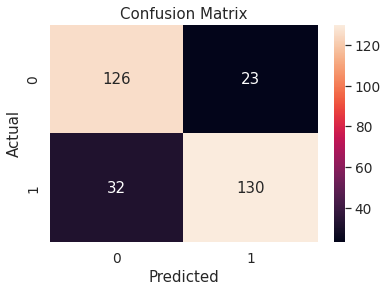

Classification Accuracy: 0.8231511254019293
Classification Error: 0.17684887459807075
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       149
           1       0.85      0.80      0.83       162

    accuracy                           0.82       311
   macro avg       0.82      0.82      0.82       311
weighted avg       0.82      0.82      0.82       311



In [613]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
    
# make class predictions for the testing set
y_pred = logreg.predict(X_test)
    
print('########### Logistic Regression ###############')
    
accuracy_score = EvaluateModel(logreg, y_test, y_pred, plot =True)
    

## <b> <font color ='green' >7.2 K-Neighbors


########### K-Neighbors ###############
RandomSearch. Best Score:  0.803898568224944
RandomSearch. Best Params:  {'weights': 'distance', 'n_neighbors': 28}


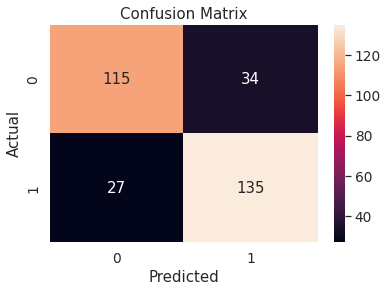

Classification Accuracy: 0.8038585209003215
Classification Error: 0.1961414790996785
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       149
           1       0.80      0.83      0.82       162

    accuracy                           0.80       311
   macro avg       0.80      0.80      0.80       311
weighted avg       0.80      0.80      0.80       311



In [614]:
model = KNeighborsClassifier()

param_dist = {'n_neighbors': list(range(1,31)),
              'weights' :['uniform', 'distance']}


print('########### K-Neighbors ###############')

RandomSearch(model, param_dist)


## <b> <font color ='green' >7.3 Decision-Tree


########### Decision-Tree ###############
RandomSearch. Best Score:  0.8231844057271003
RandomSearch. Best Params:  {'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 17, 'max_depth': 2, 'criterion': 'entropy'}


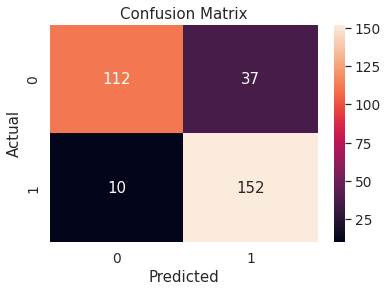

Classification Accuracy: 0.8488745980707395
Classification Error: 0.1511254019292605
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       149
           1       0.80      0.94      0.87       162

    accuracy                           0.85       311
   macro avg       0.86      0.84      0.85       311
weighted avg       0.86      0.85      0.85       311



In [627]:
model_2 = DecisionTreeClassifier()
param_dist = {'max_depth': list(range(1, 9)),
              "max_features": list(range(1, len(X.columns))),
              "min_samples_split": list(range(2, 9)),
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"],
              } 

print('########### Decision-Tree ###############')
RandomSearch(model_2, param_dist)


In [617]:
import graphviz
model_2.fit(X_train,y_train)
dot_data  = tree.export_graphviz(model_2,max_depth = 8,filled = True)

graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")


'decision_tree_graphivz.png'

## <b> <font color ='green' >7.4 RandomForest


########### Random Forest ###############
RandomSearch. Best Score:  0.8242596745443045
RandomSearch. Best Params:  {'n_estimators': 12, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 12, 'max_depth': 4, 'criterion': 'gini'}


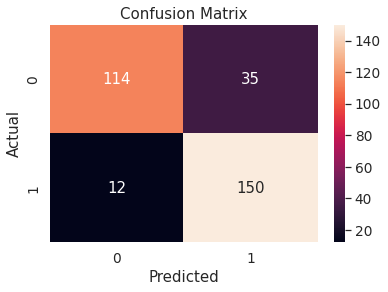

Classification Accuracy: 0.8488745980707395
Classification Error: 0.1511254019292605
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       149
           1       0.81      0.93      0.86       162

    accuracy                           0.85       311
   macro avg       0.86      0.85      0.85       311
weighted avg       0.86      0.85      0.85       311



In [618]:
model_3 = RandomForestClassifier()
estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
param_dist = {'n_estimators' : estimators,
             'max_depth': list(range(1, 9)),
              "max_features": list(range(1, len(X.columns))),
              "min_samples_split": list(range(3, 9)),
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"]} 


print('########### Random Forest ###############')

RandomSearch(model_3, param_dist)


## <b> <font color ='green' >7.5 AdaBoosting


########### AdaBoosting ###############


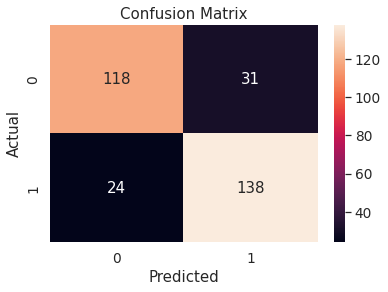

Classification Accuracy: 0.8231511254019293
Classification Error: 0.17684887459807075
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       149
           1       0.82      0.85      0.83       162

    accuracy                           0.82       311
   macro avg       0.82      0.82      0.82       311
weighted avg       0.82      0.82      0.82       311



In [619]:
tree = DecisionTreeClassifier(max_depth = 1)
model = AdaBoostClassifier(base_estimator= tree, n_estimators= 100,random_state = 2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('########### AdaBoosting ###############')

EvaluateModel(model, y_test, y_pred, True)

## <b> <font color ='green' >7.6 GradientBoosting


########### GradientBoosting ###############


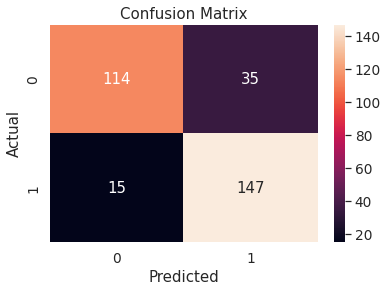

Classification Accuracy: 0.8392282958199357
Classification Error: 0.16077170418006426
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       149
           1       0.81      0.91      0.85       162

    accuracy                           0.84       311
   macro avg       0.85      0.84      0.84       311
weighted avg       0.84      0.84      0.84       311



In [620]:
model = GradientBoostingClassifier(n_estimators =100, max_depth =1,random_state = 2 )
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('########### GradientBoosting ###############')

EvaluateModel(model, y_test, y_pred, True)

## <b> <font color ='green' >7.7 Bagging


########### Bagging ###############


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomSearch. Best Score:  0.8231844057271003
RandomSearch. Best Params:  {'base_estimator__max_depth': 1}


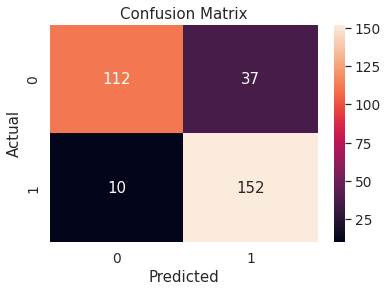

Classification Accuracy: 0.8488745980707395
Classification Error: 0.1511254019292605
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       149
           1       0.80      0.94      0.87       162

    accuracy                           0.85       311
   macro avg       0.86      0.84      0.85       311
weighted avg       0.86      0.85      0.85       311



In [621]:
tree = DecisionTreeClassifier()

model_4 = BaggingClassifier(base_estimator = tree, bootstrap_features=False, n_estimators = 100,random_state = 2)
param_dist = {'base_estimator__max_depth' : [1,2,3]}


print('########### Bagging ###############')

RandomSearch(model_4, param_dist)


# <b> <font color ='green' >8. Success method plot


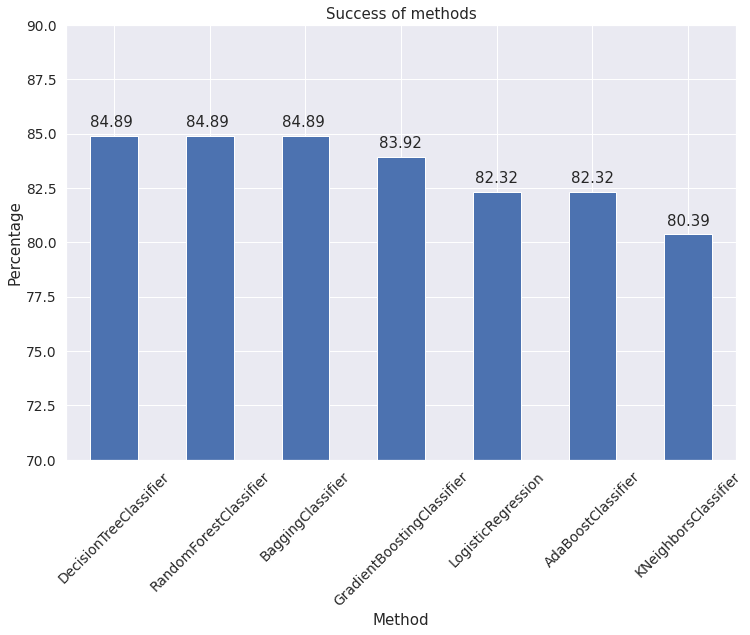

In [622]:
s = pd.Series(methodDict)
s = s.sort_values(ascending=False)
plt.figure(figsize=(12,8))

ax = s.plot(kind='bar') 
for p in ax.patches:
  ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylim([70.0, 90.0]) 
plt.xticks(rotation = 45)
plt.xlabel('Method')
plt.ylabel('Percentage')
plt.title('Success of methods')
     
plt.show()

# <b> <font color ='green' >9. Creating predictions on test set


      Index  predict_Treatment  test_treatment
1060   1060                  1               1
921     921                  1               1
1043   1043                  1               1
684     684                  0               0
583     583                  0               0
...     ...                ...             ...
10       10                  1               1
416     416                  1               1
689     689                  1               1
538     538                  0               0
1183   1183                  1               1

[311 rows x 3 columns]


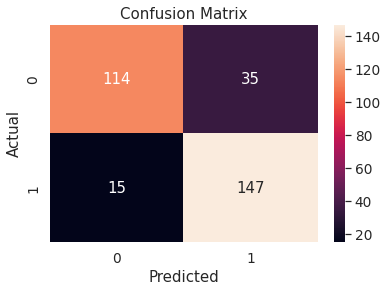

Classification Accuracy: 0.8392282958199357
Classification Error: 0.16077170418006426
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       149
           1       0.81      0.91      0.85       162

    accuracy                           0.84       311
   macro avg       0.85      0.84      0.84       311
weighted avg       0.84      0.84      0.84       311



In [628]:
#Because the result showed that Decision Tree, RandomForest,Bagging have the same result. So we can use the decision Tree with best parameters for saving time but still get the best result
model = DecisionTreeClassifier(min_samples_split= 7, min_samples_leaf= 7, max_features= 17, max_depth = 2, criterion = 'gini')

model.fit(X_train, y_train)
dfTestPredictions = model.predict(X_test)

# Write predictions to csv file
results = pd.DataFrame({'Index': X_test.index, 'predict_Treatment': dfTestPredictions,'test_treatment': y_test})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
print(results)
EvaluateModel(model, y_test, y_pred, True)

# <b> <font color ='green' >10. Saving model


In [624]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
modeltosave = model

import _pickle as cPickle
import os
with open('/content/drive/MyDrive/Mindx_final/DucDat_De1_model.pkl', 'wb') as f:
    cPickle.dump(modeltosave, f)

print('Saved Model')